# This Project is for the prediction of the eligibiity of a credit for the customer.    This notebook is working on small data set  where i can even run Support vector algorithm also. Because of computing power I could not run it with larger data set.

In [728]:

import matplotlib as plt
import matplotlib.pyplot as pyplots
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import sys
from sklearn import svm
import sklearn
import joblib

from sklearn import preprocessing 
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import sys
import scikitplot as skplt

import seaborn as sns



In [729]:
Original_dataset = pd.read_csv("bank.csv", sep=';'  , engine='python')
Original_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


D:\Python\anaconda\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


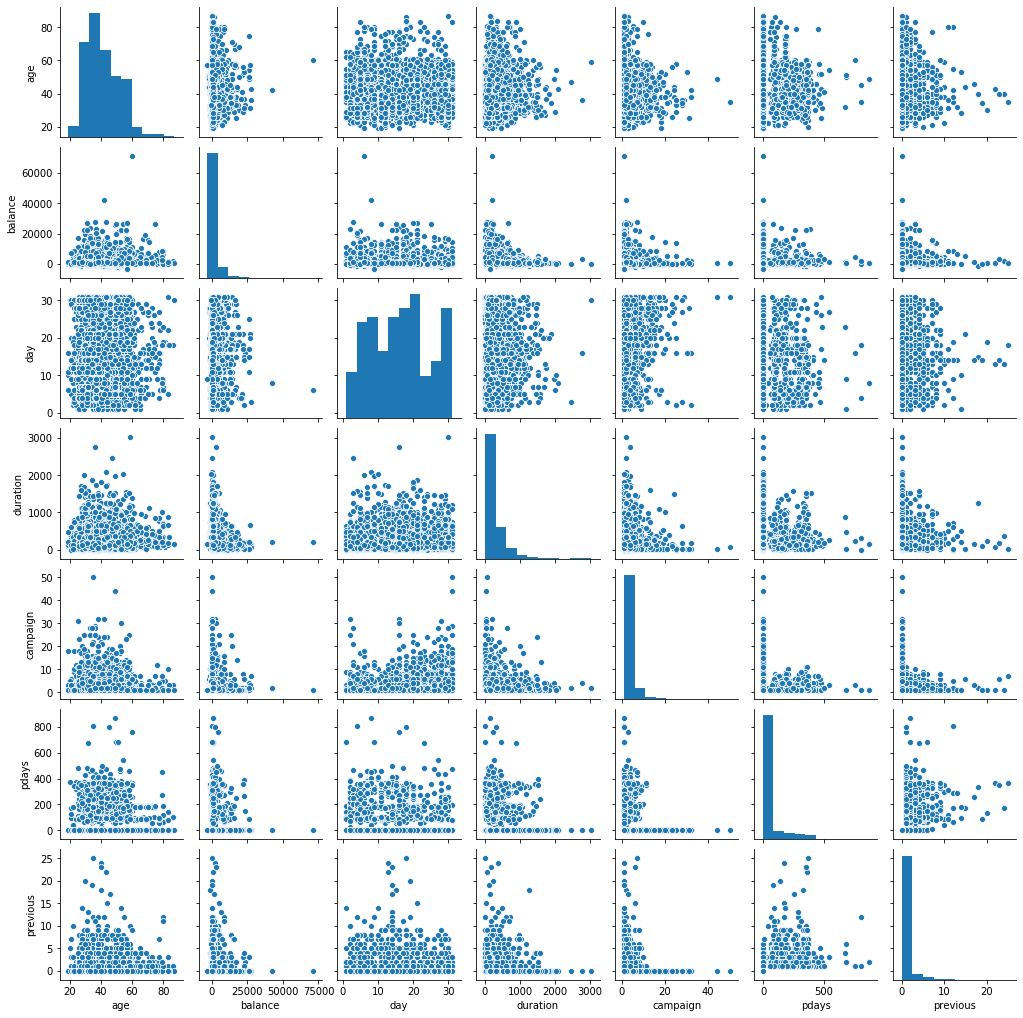

In [730]:
sns.pairplot(Original_dataset[Original_dataset.columns],size=2)

In [731]:
Original_dataset.shape

(4521, 17)

In [732]:
copy_Original_dataset = Original_dataset.copy()

In [733]:
Original_dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [734]:
Original_dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

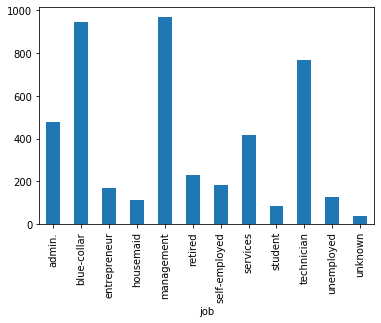

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [735]:
index = len(Original_dataset['job'].unique())
counts = Original_dataset.groupby(['job']).size()
counts.plot.bar()
pyplots.bar(Original_dataset['job'].size,index)
pyplots.show()
Original_dataset['job'].unique()


In [736]:
df = Original_dataset.copy()

# The following blocks are added after seeing the result to find best parameters.

In the result it was very difficut to make the output to 'yes' so find the best parameters to do the fit

In [737]:
copy_Original_dataset["job"] = copy_Original_dataset["job"].astype('category')
copy_Original_dataset["marital"] = copy_Original_dataset["marital"].astype('category')
copy_Original_dataset["education"] = copy_Original_dataset["education"].astype('category')
copy_Original_dataset["default"] = copy_Original_dataset["default"].astype('category')
copy_Original_dataset["housing"] = copy_Original_dataset["housing"].astype('category')
copy_Original_dataset["loan"] = copy_Original_dataset["loan"].astype('category')
copy_Original_dataset["y"] = copy_Original_dataset["y"].astype('category')
copy_Original_dataset["contact"] = copy_Original_dataset["contact"].astype('category')
copy_Original_dataset["poutcome"] = copy_Original_dataset["poutcome"].astype('category')
copy_Original_dataset["month"] = copy_Original_dataset["month"].astype('category')


In [738]:
copy_Original_dataset['jobcat'] = copy_Original_dataset['job'].apply(lambda 
    x: ['unemployed', 'student', 'unknown', 'retired','housemaid','blue-collar', 
        'technician','services', 'admin.','self-employed','management','entrepreneur' ].index(x))
copy_Original_dataset['educationcat'] = copy_Original_dataset['education'].apply(lambda 
    x: ['primary', 'unknown', 'secondary', 'tertiary'].index(x))
copy_Original_dataset['defaultcat'] = copy_Original_dataset['default'].apply(lambda x: ['no', 'yes'].index(x))
copy_Original_dataset['housingcat'] = copy_Original_dataset['housing'].apply(lambda x: ['no', 'yes'].index(x))
copy_Original_dataset['loancat'] = copy_Original_dataset['loan'].apply(lambda x: ['no', 'yes'].index(x))
copy_Original_dataset['maritalcat'] = copy_Original_dataset['marital'].apply(lambda x: ['single', 'divorced','married'  ].index(x))
copy_Original_dataset['poutcome'] = copy_Original_dataset['poutcome'].apply(lambda x: ['failure', 'unknown','other', 'success' ].index(x))

In [739]:
copy_Original_dataset.dtypes

age                int64
job             category
marital         category
education       category
default         category
balance            int64
housing         category
loan            category
contact         category
day                int64
month           category
duration           int64
campaign           int64
pdays              int64
previous           int64
poutcome        category
y               category
jobcat          category
educationcat    category
defaultcat      category
housingcat      category
loancat         category
maritalcat      category
dtype: object

In [740]:
copy_Original_dataset['jobcat']

0        0
1        7
2       10
3       10
4        5
        ..
4516     7
4517     9
4518     6
4519     5
4520    11
Name: jobcat, Length: 4521, dtype: category
Categories (12, int64): [8, 5, 11, 4, ..., 1, 6, 0, 2]

In [741]:
del copy_Original_dataset['job']
del copy_Original_dataset['education']
del copy_Original_dataset['default']
del copy_Original_dataset['housing']
del copy_Original_dataset['loan']
del copy_Original_dataset['marital']
del copy_Original_dataset['month']
del copy_Original_dataset['day']
del copy_Original_dataset['contact']


In [742]:

copy_Original_dataset['y'] = copy_Original_dataset['y'].cat.codes
copyy= copy_Original_dataset['y']

In [743]:

del copy_Original_dataset['y']

In [744]:
copy_Original_dataset.dtypes

age                int64
balance            int64
duration           int64
campaign           int64
pdays              int64
previous           int64
poutcome        category
jobcat          category
educationcat    category
defaultcat      category
housingcat      category
loancat         category
maritalcat      category
dtype: object

In [745]:

modeltest = RandomForestRegressor()

modeltest.fit(copy_Original_dataset,copyy)

RandomForestRegressor()

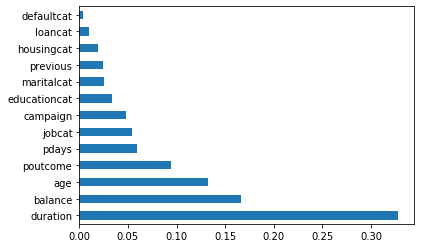

In [746]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(modeltest.feature_importances_, index=copy_Original_dataset.columns)
feat_importances.nlargest(15).plot(kind='barh')

# The above blocks are added after seeing the result to find best parameters to do the modelling again.

# Please check another modelling in the folder called Customer-Credit-Check-small-best-parameters

In [747]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [748]:
df["job"] = df["job"].astype('category')
df["marital"] = df["marital"].astype('category')
df["education"] = df["education"].astype('category')
df["default"] = df["default"].astype('category')
df["housing"] = df["housing"].astype('category')
df["loan"] = df["loan"].astype('category')
df["y"] = df["y"].astype('category')
df["contact"] = df["contact"].astype('category')
df["poutcome"] = df["poutcome"].astype('category')
df["month"] = df["month"].astype('category')


In [749]:
df['jobcat'] = df['job'].apply(lambda 
    x: ['unemployed', 'student', 'unknown', 'retired','housemaid','blue-collar', 
        'technician','services', 'admin.','self-employed','management','entrepreneur' ].index(x))
df['educationcat'] = df['education'].apply(lambda 
    x: ['primary', 'unknown', 'secondary', 'tertiary'].index(x))
df['defaultcat'] = df['default'].apply(lambda x: ['no', 'yes'].index(x))
df['housingcat'] = df['housing'].apply(lambda x: ['no', 'yes'].index(x))
df['loancat'] = df['loan'].apply(lambda x: ['no', 'yes'].index(x))
df['maritalcat'] = df['marital'].apply(lambda x: ['single', 'divorced','married'  ].index(x))
df['poutcome'] = df['poutcome'].apply(lambda x: ['failure', 'unknown','other', 'success' ].index(x))


In [750]:
df['poutcome'] = df['poutcome'].cat.codes# tobe converted to one hot encoder

df['age'] = df['age']/df['age'].max()
df['duration'] = df['duration']/df['duration'].max()
df['poutcome'] = df['poutcome']/df['poutcome'].max()

D:\Python\anaconda\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


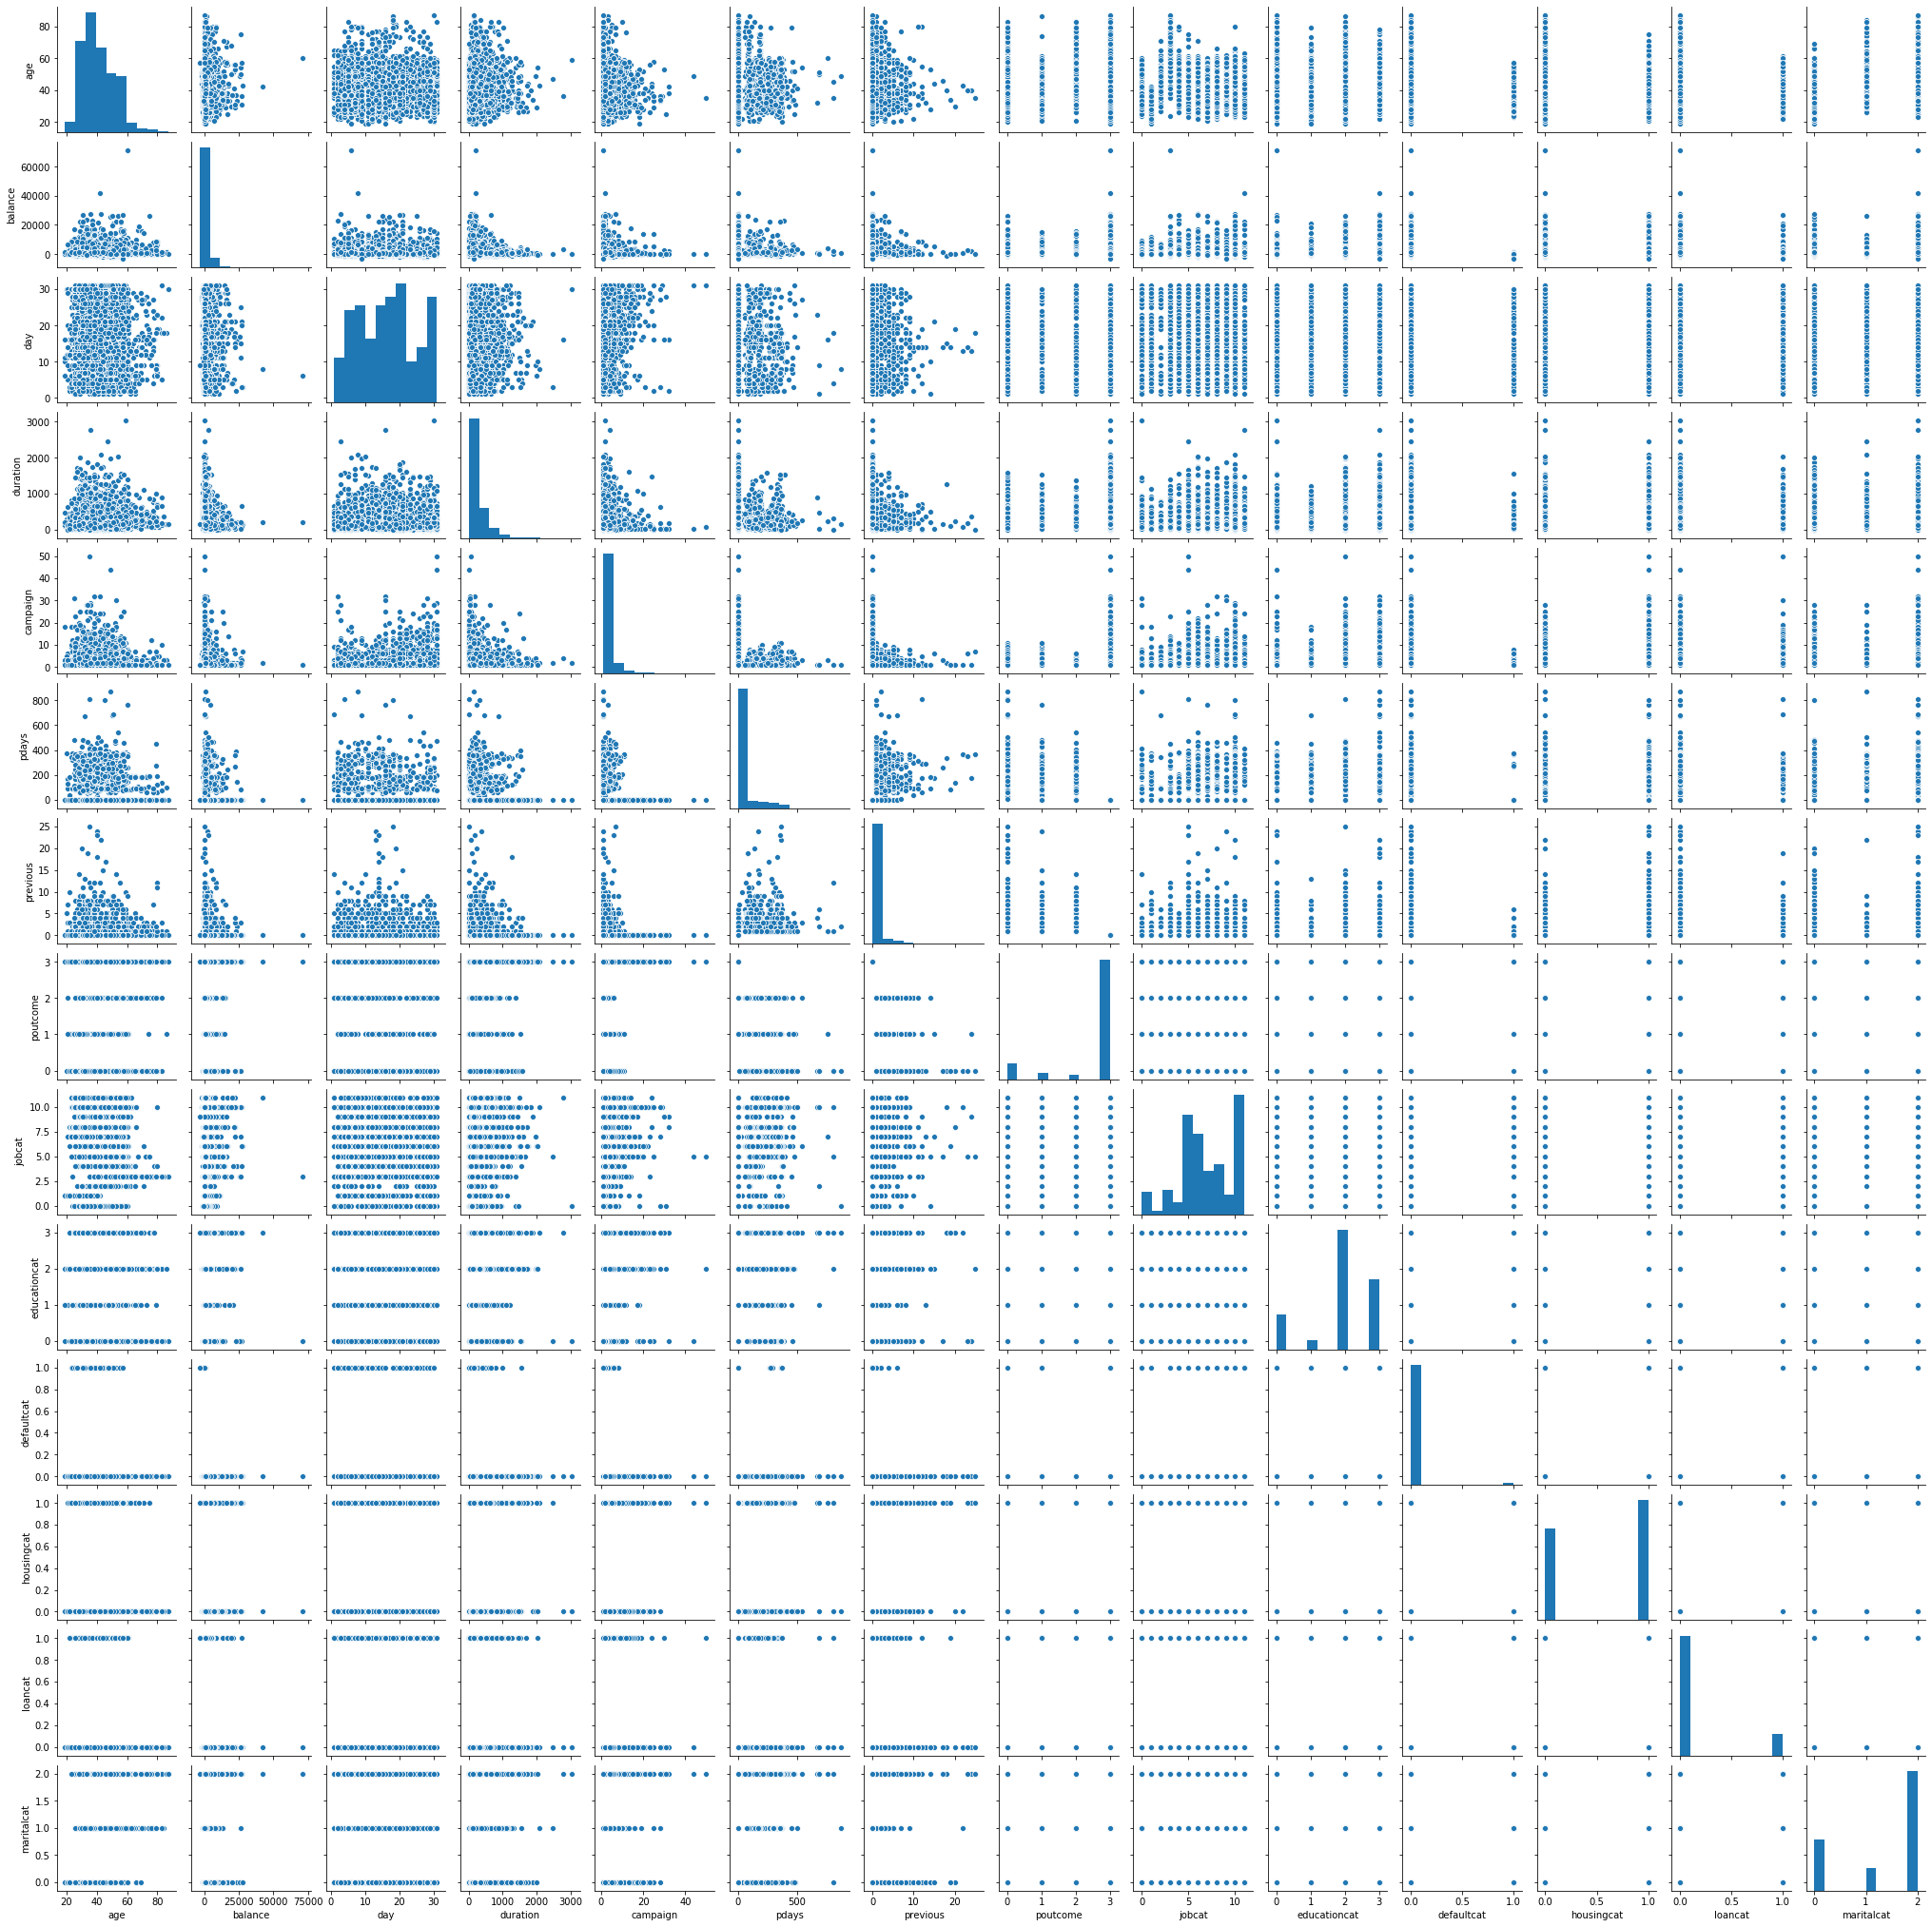

In [751]:
sns.pairplot(df[df.columns],size=2)

# The following features need to be removed as they are made categorical variable.

In [752]:
del df['job']
del df['education']
del df['default']
del df['housing']
del df['loan']
del df['marital']
del df['month']
del df['day']

#del df['balance']
del df['maritalcat']
del df['loancat']
del df['campaign']
del df['contact']


In [753]:
yy = ['y'] 
predictors = list(set(list(df.columns))-set(yy))
XX = df[predictors]
df['y'] = df['y'].cat.codes
y= df['y']

In [754]:
df.columns

Index(['age', 'balance', 'duration', 'pdays', 'previous', 'poutcome', 'y',
       'jobcat', 'educationcat', 'defaultcat', 'housingcat'],
      dtype='object')

In [755]:
df.loc[df['y'] == 1]

,age,balance,duration,pdays,previous,poutcome,y,jobcat,educationcat,defaultcat,housingcat
13,20,502,261,-1,0,3,1,1,2,0,0
30,68,4189,897,-1,0,3,1,3,2,0,0
33,32,2536,958,-1,0,3,1,10,3,0,1
34,49,1235,354,-1,0,3,1,6,3,0,0
36,78,229,97,-1,0,3,1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4494,26,668,576,-1,0,3,1,6,2,0,1
4503,60,362,816,-1,0,3,1,9,0,0,0
4504,42,1080,951,370,4,0,1,5,2,0,1
4505,32,620,1234,-1,0,3,1,8,2,0,1


In [756]:


del df['y']
X=df.copy()


In [757]:

X['jobcat']= X['jobcat'].cat.codes

X['educationcat']= X['educationcat'].cat.codes


X['housingcat']= X['housingcat'].cat.codes


X['defaultcat']= X['defaultcat'].cat.codes

In [758]:
X.dtypes

age             int64
balance         int64
duration        int64
pdays           int64
previous        int64
poutcome         int8
jobcat           int8
educationcat     int8
defaultcat       int8
housingcat       int8
dtype: object

In [759]:
print(X)

      age  balance  duration  pdays  previous  poutcome  jobcat  educationcat  \
0      30     1787        79     -1         0         3      10             0   
1      33     4789       220    339         4         0       7             1   
2      35     1350       185    330         1         0       4             2   
3      30     1476       199     -1         0         3       4             2   
4      59        0       226     -1         0         3       1             1   
...   ...      ...       ...    ...       ...       ...     ...           ...   
4516   33     -333       329     -1         0         3       7             1   
4517   57    -3313       153     -1         0         3       6             2   
4518   57      295       151     -1         0         3       9             1   
4519   28     1137       129    211         3         1       1             1   
4520   44     1136       345    249         7         1       2             2   

      defaultcat  housingca

In [760]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [761]:
results = pd.DataFrame(columns=['model', 'accuracy', 'precision','recall', 'fscore'])

# LinearRegression

In [762]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# fit model no training data
model = LinearRegression()
model.fit(X_train, y_train)
# make predictions for test data
y_pred_proba = model.predict(X_test)



threshold = 0.7
y_pred = [0 if p < threshold else 1 for p in y_pred_proba]

# evaluate predictions
accuracy= accuracy_score(y_test,y_pred )
print(accuracy)

classifier = 'LinearRegression'

0.881367292225201


In [763]:
accuracy= accuracy_score(y_test, y_pred)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')


MCC= matthews_corrcoef(y_test, y_pred)

Aresult = [[classifier,accuracy,precision,recall,fscore,MCC]]
oneresultdf = pd.DataFrame(Aresult,columns=['model', 'accuracy', 'precision','recall', 'fscore','MCC'])

results.append(oneresultdf)
results=pd.concat([results, oneresultdf])
results

,model,accuracy,precision,recall,fscore,MCC
0,LinearRegression,0.881367,0.753875,0.512824,0.495097,0.114118


In [764]:
joblib_file = "VK_linR_Model_sm.pkl"  
joblib.dump(model, joblib_file)

['VK_linR_Model_sm.pkl']

In [765]:
print(X)

      age  balance  duration  pdays  previous  poutcome  jobcat  educationcat  \
0      30     1787        79     -1         0         3      10             0   
1      33     4789       220    339         4         0       7             1   
2      35     1350       185    330         1         0       4             2   
3      30     1476       199     -1         0         3       4             2   
4      59        0       226     -1         0         3       1             1   
...   ...      ...       ...    ...       ...       ...     ...           ...   
4516   33     -333       329     -1         0         3       7             1   
4517   57    -3313       153     -1         0         3       6             2   
4518   57      295       151     -1         0         3       9             1   
4519   28     1137       129    211         3         1       1             1   
4520   44     1136       345    249         7         1       2             2   

      defaultcat  housingca

# XGBClassifier

0.8806970509383378


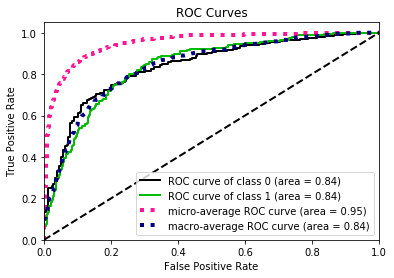

In [766]:

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

# evaluate predictions
accuracy= accuracy_score(y_test,y_pred )
print(accuracy)


y_probas = model.predict_proba(X_test) # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc(y_test, y_probas)
classifier = 'XGBClassifier'

In [767]:

accuracy= accuracy_score(y_test, y_pred)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')


MCC= matthews_corrcoef(y_test, y_pred)

Aresult = [[classifier,accuracy,precision,recall,fscore,MCC]]
oneresultdf = pd.DataFrame(Aresult,columns=['model', 'accuracy', 'precision','recall', 'fscore','MCC'])

results.append(oneresultdf)
results=pd.concat([results, oneresultdf])
results

,model,accuracy,precision,recall,fscore,MCC
0,LinearRegression,0.881367,0.753875,0.512824,0.495097,0.114118
0,XGBClassifier,0.880697,0.705745,0.616180,0.642341,0.309215


In [768]:
joblib_file = "VK_xgb_Model_sm.pkl"  
joblib.dump(model, joblib_file)

['VK_xgb_Model_sm.pkl']

# LogisticRegression

D:\Python\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8820375335120644


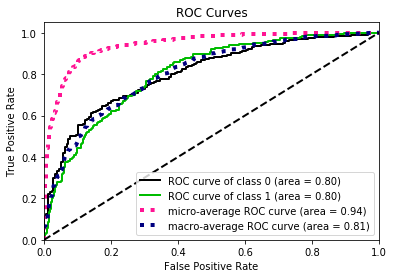

In [769]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)

print (accuracy)

y_probas=model.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_probas)
classifier = 'LogisticRegression'

In [770]:
accuracy= accuracy_score(y_test, y_pred)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')


MCC= matthews_corrcoef(y_test, y_pred)

Aresult = [[classifier,accuracy,precision,recall,fscore,MCC]]
oneresultdf = pd.DataFrame(Aresult,columns=['model', 'accuracy', 'precision','recall', 'fscore','MCC'])

results.append(oneresultdf)
results=pd.concat([results, oneresultdf])
results

cm = confusion_matrix(y_test, y_pred)
cm

array([[1293,   20],
       [ 156,   23]], dtype=int64)

In [771]:
joblib_file = "VK_logR_Model_sm.pkl"  
joblib.dump(model, joblib_file)

['VK_logR_Model_sm.pkl']

# DecisionTreeRegressor

In [772]:
model_DT = DecisionTreeRegressor()
model_DT.fit(X_train, y_train) 

pred_test_DT= model_DT.predict(X_test)

y_pred = [0 if p < threshold else 1 for p in pred_test_DT]

cm=confusion_matrix(y_test,y_pred)

y_predicted=model_DT.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(accuracy)
print(cm)
classifier ='DecisionTreeRegressor'

0.8371313672922251
[[1188  125]
 [ 118   61]]


In [773]:
accuracy= accuracy_score(y_test, y_pred)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')


MCC= matthews_corrcoef(y_test, y_pred)

Aresult = [[classifier,accuracy,precision,recall,fscore,MCC]]
oneresultdf = pd.DataFrame(Aresult,columns=['model', 'accuracy', 'precision','recall', 'fscore','MCC'])

results.append(oneresultdf)
results=pd.concat([results, oneresultdf])
results


,model,accuracy,precision,recall,fscore,MCC
0,LinearRegression,0.881367,0.753875,0.512824,0.495097,0.114118
0,XGBClassifier,0.880697,0.705745,0.616180,0.642341,0.309215
0,LogisticRegression,0.882038,0.713612,0.556630,0.571743,0.219970
0,DecisionTreeRegressor,0.837131,0.618802,0.622790,0.620732,0.241560


In [774]:
joblib_file = "VK_DTR_Model_sm.pkl"  
joblib.dump(model_DT, joblib_file)

['VK_DTR_Model_sm.pkl']

# DecisionTreeClassifier

In [775]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train) 

pred_test_DT= model_DT.predict(X_test)


cm=confusion_matrix(y_test,pred_test_DT)

y_predicted=model_DT.predict(X_test)
accuracy= accuracy_score(y_test, y_predicted)
print(accuracy)
print(cm)
classifier = 'DecisionTreeClassifier'

0.8404825737265416
[[1194  119]
 [ 119   60]]


In [776]:
accuracy= accuracy_score(y_test, y_pred)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')


MCC= matthews_corrcoef(y_test, y_pred)

Aresult = [[classifier,accuracy,precision,recall,fscore,MCC]]
oneresultdf = pd.DataFrame(Aresult,columns=['model', 'accuracy', 'precision','recall', 'fscore','MCC'])

results.append(oneresultdf)
results=pd.concat([results, oneresultdf])
results

,model,accuracy,precision,recall,fscore,MCC
0,LinearRegression,0.881367,0.753875,0.512824,0.495097,0.114118
0,XGBClassifier,0.880697,0.705745,0.616180,0.642341,0.309215
0,LogisticRegression,0.882038,0.713612,0.556630,0.571743,0.219970
0,DecisionTreeRegressor,0.837131,0.618802,0.622790,0.620732,0.241560
0,DecisionTreeClassifier,0.837131,0.618802,0.622790,0.620732,0.241560


In [777]:
joblib_file = "VK_DTC_Model_sm.pkl"  
joblib.dump(model_DT, joblib_file)

['VK_DTC_Model_sm.pkl']

# RandomForestRegressor

In [778]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train) 

pred_test_RF = model_RF.predict(X_test)

y_pred = [0 if p < threshold else 1 for p in pred_test_RF]
cm = confusion_matrix(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
print(accuracy)
print (cm)
classifier = 'RandomForestRegressor'

0.8853887399463807
[[1303   10]
 [ 161   18]]


In [779]:
accuracy= accuracy_score(y_test, y_pred)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')


MCC= matthews_corrcoef(y_test, y_pred)

Aresult = [[classifier,accuracy,precision,recall,fscore,MCC]]
oneresultdf = pd.DataFrame(Aresult,columns=['model', 'accuracy', 'precision','recall', 'fscore','MCC'])

results.append(oneresultdf)
results=pd.concat([results, oneresultdf])
results

,model,accuracy,precision,recall,fscore,MCC
0,LinearRegression,0.881367,0.753875,0.512824,0.495097,0.114118
0,XGBClassifier,0.880697,0.705745,0.616180,0.642341,0.309215
0,LogisticRegression,0.882038,0.713612,0.556630,0.571743,0.219970
0,DecisionTreeRegressor,0.837131,0.618802,0.622790,0.620732,0.241560
0,DecisionTreeClassifier,0.837131,0.618802,0.622790,0.620732,0.241560
0,RandomForestRegressor,0.885389,0.766442,0.546471,0.556168,0.222548


In [780]:
joblib_file = "VK_RF_Model_sm.pkl"  
joblib.dump(model_DT, joblib_file)

['VK_RF_Model_sm.pkl']

# SVM 
takes a long time to excute if we dont have enough computing power. so commented two blocks below this if you dont have enough power

model_SVM = svm.SVR(kernel='linear')
model_SVM.fit(X_train, y_train) 

pred_test_RF_proba= model_SVM.predict(X_test)

y_pred = [0 if p < threshold else 1 for p in pred_test_RF_proba]

confusion_matrix(y_test,y_pred)

classifier = 'SVM'

accuracy= accuracy_score(y_test, y_pred)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')


MCC= matthews_corrcoef(y_test, y_pred)

Aresult = [[classifier,accuracy,precision,recall,fscore,MCC]]
oneresultdf = pd.DataFrame(Aresult,columns=['model', 'accuracy', 'precision','recall', 'fscore','MCC'])

results.append(oneresultdf)
results=pd.concat([results, oneresultdf])
results

joblib_file = "VK_svm_Model_sm.pkl"  
joblib.dump(model_SVM, joblib_file)

# AdaBoostClassifier

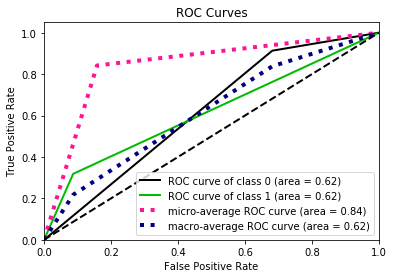

In [781]:
Model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=32),
    n_estimators=200
)
Model.fit(X_train, y_train)

y_pred = model.predict(X_test)




y_probas=Model.predict_proba(X_test)


skplt.metrics.plot_roc(y_test, y_probas)
classifier ='AdaBoostClassifier'

In [782]:
accuracy= accuracy_score(y_test, y_pred)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')


MCC= matthews_corrcoef(y_test, y_pred)

Aresult = [[classifier,accuracy,precision,recall,fscore,MCC]]
oneresultdf = pd.DataFrame(Aresult,columns=['model', 'accuracy', 'precision','recall', 'fscore','MCC'])

results.append(oneresultdf)
results=pd.concat([results, oneresultdf])
results

,model,accuracy,precision,recall,fscore,MCC
0,LinearRegression,0.881367,0.753875,0.512824,0.495097,0.114118
0,XGBClassifier,0.880697,0.705745,0.616180,0.642341,0.309215
0,LogisticRegression,0.882038,0.713612,0.556630,0.571743,0.219970
0,DecisionTreeRegressor,0.837131,0.618802,0.622790,0.620732,0.241560
0,DecisionTreeClassifier,0.837131,0.618802,0.622790,0.620732,0.241560
0,RandomForestRegressor,0.885389,0.766442,0.546471,0.556168,0.222548
0,AdaBoostClassifier,0.882038,0.713612,0.556630,0.571743,0.219970


In [783]:
joblib_file = "VK_ADB_Model_sm.pkl"  
joblib.dump(Model, joblib_file)

['VK_ADB_Model_sm.pkl']

In [784]:
results

,model,accuracy,precision,recall,fscore,MCC
0,LinearRegression,0.881367,0.753875,0.512824,0.495097,0.114118
0,XGBClassifier,0.880697,0.705745,0.616180,0.642341,0.309215
0,LogisticRegression,0.882038,0.713612,0.556630,0.571743,0.219970
0,DecisionTreeRegressor,0.837131,0.618802,0.622790,0.620732,0.241560
0,DecisionTreeClassifier,0.837131,0.618802,0.622790,0.620732,0.241560
0,RandomForestRegressor,0.885389,0.766442,0.546471,0.556168,0.222548
0,AdaBoostClassifier,0.882038,0.713612,0.556630,0.571743,0.219970


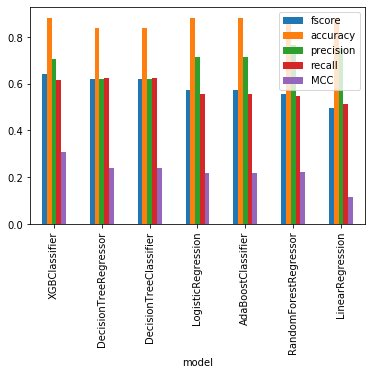

In [785]:
h=results.sort_values(by='fscore',ascending=False).plot(kind='bar',x='model',y=['fscore','accuracy','precision','recall','MCC'])